## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install scipy
import scipy.stats as sts
import math
%matplotlib inline
!pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Agito\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Agito\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
import statsmodels.stats.weightstats as st

### распределение Коши из модуля scipy.stats

In [8]:
# Задаю параметры распределения Коши
x0 = 0  # Параметр местоположения
gamma = 1  # Параметр масштаба

In [9]:
# Генерирую выборку
# 1000 выборок
samples = np.random.standard_cauchy(size=1000)  

In [10]:
# Создаю объект распределения Коши
# Параметры: местоположение и масштаб
cauchy_dist = sts.cauchy(loc=0, scale=1)  

Распределение Коши не имеет определенного математического ожидания, поэтому при попытке вызвать mean() получиться nan

In [11]:
# Получаю среднее значение (которое будет nan)
real_mean = cauchy_dist.mean()

In [12]:
print(f'Настоящее среднее случайной величины (распределение Коши): {real_mean}')

Настоящее среднее случайной величины (распределение Коши): nan


Распределение Коши также не имеет определенной дисперсии. Поэтому, при попытке получить дисперсию, используя метод var(), результатом будет nan

In [13]:
# Создаю объект распределения Коши
# Параметры: местоположение и масштаб
cauchy_dist = sts.cauchy(loc=0, scale=1)  

In [14]:
real_var = cauchy_dist.var() # настоящая дисперсия случайной величины

In [15]:
print(f'Настоящая дисперсия случайной величины (распределение Коши): {real_var}')

Настоящая дисперсия случайной величины (распределение Коши): nan


### Постройте гистограмму выборки и теоретическую плотность распределения

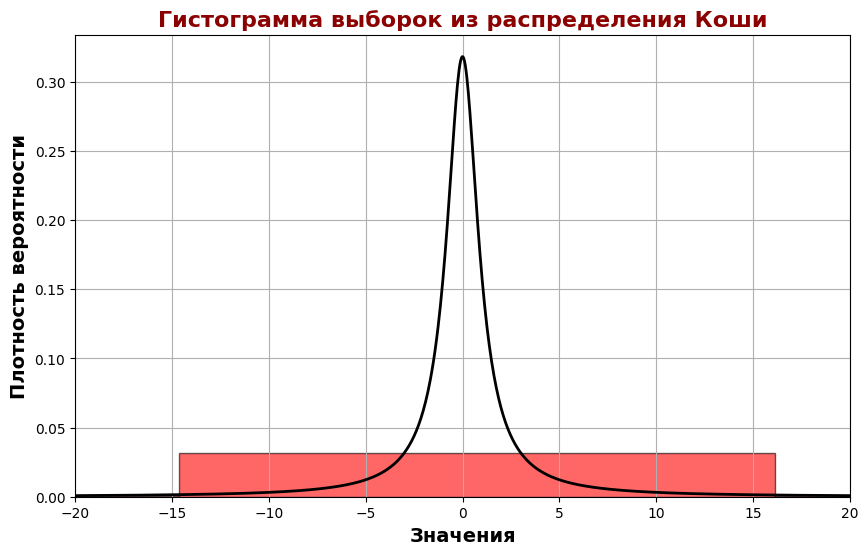

In [16]:
# Визуализация
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='r', edgecolor='black')

# Кривая плотности распределения Коши
x = np.linspace(-20, 20, 1000)  # Создаю диапазон значений
p = sts.cauchy.pdf(x, x0, gamma)  # Вычисляю плотность
plt.plot(x, p, 'k', linewidth=2)  # Строю кривую плотности

# Настройки графика
title = "Гистограмма выборок из распределения Коши"
plt.title(title, fontsize=16, fontweight='bold', color='DarkRed')
plt.xlabel('Значения', fontsize=14, fontweight='bold', color='Black')
plt.ylabel('Плотность вероятности', fontsize=14, fontweight='bold', color='Black')
plt.xlim(-20, 20)  
plt.grid()
plt.show()

In [17]:
# Выборочное среднее
samples_mean = np.mean(samples)
print(f'Выборочное среднее: {samples_mean}')

Выборочное среднее: 0.6038099715224334


In [18]:
# Выборочная дисперсия
samples_var = np.var(samples, ddof=1)
print(f'Выборочная дисперсия: {samples_var}')

Выборочная дисперсия: 717.2928878506658


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [43]:
# Параметры
sample_sizes = [5, 10, 30, 50]  # Размеры выборок
num_samples = 1000  # Количество выборок


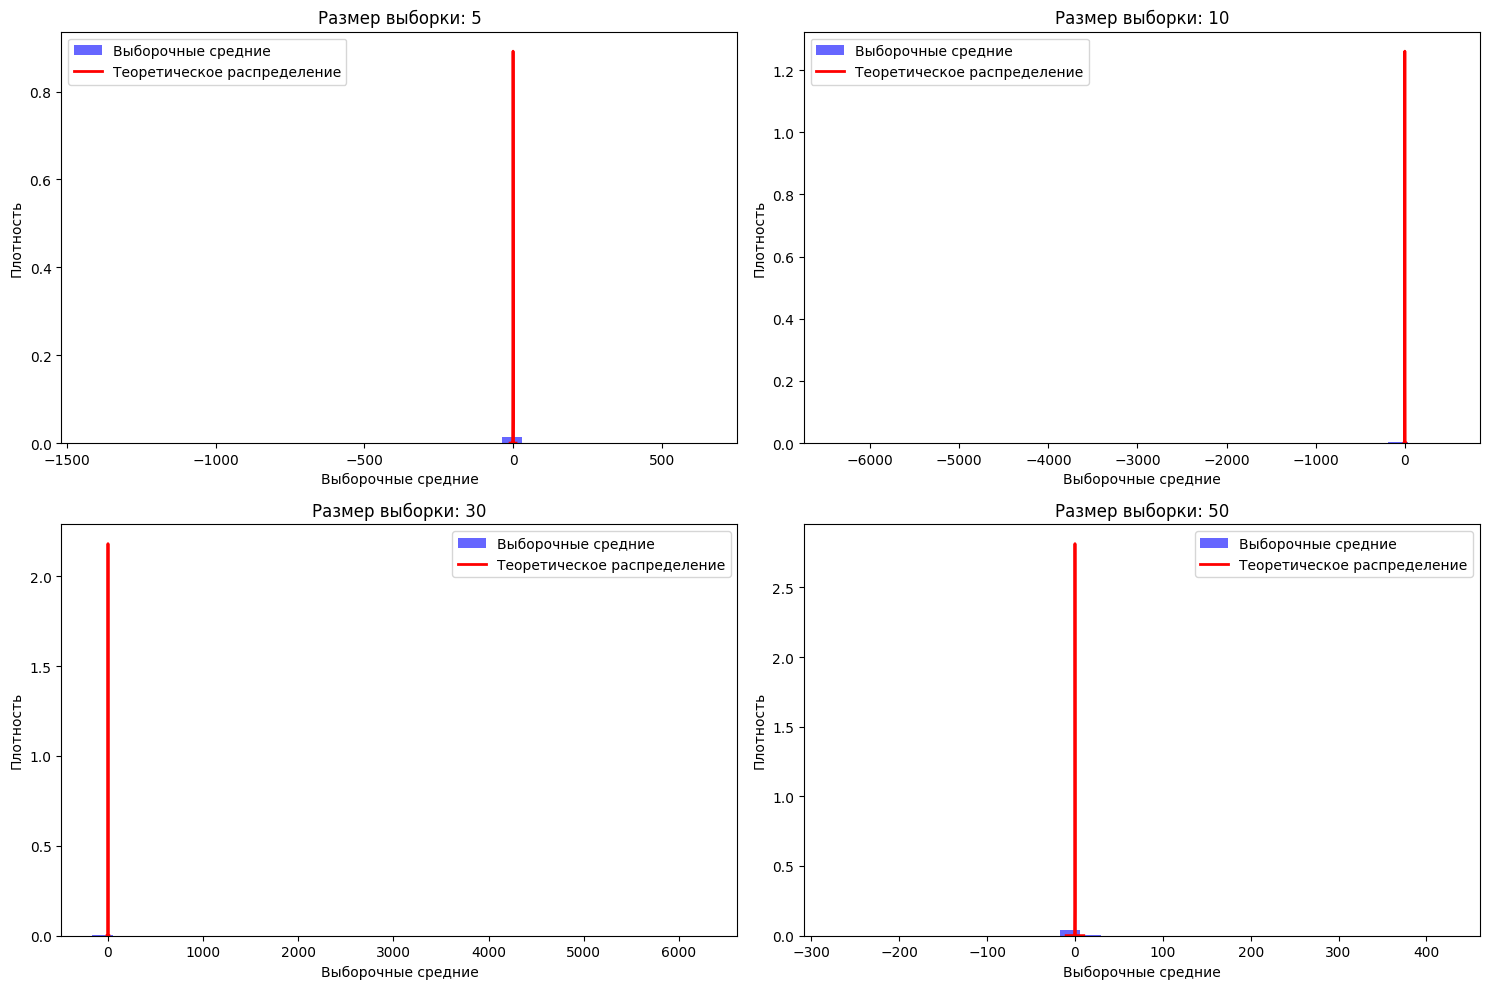

In [44]:
plt.figure(figsize=(15, 10))

for i, n in enumerate(sample_sizes):
    # Генерация выборок и расчет выборочных средних
    sample_means = [np.mean(np.random.standard_cauchy(size=n)) for _ in range(num_samples)]
    
    # Построение гистограммы выборочных средних
    plt.subplot(2, 2, i + 1)
    plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='b', label='Выборочные средние')

    # Теоретическое распределение выборочных средних
    # Используем нормальное приближение
    theoretical_mu = 0  # Математическое ожидание для нормального распределения
    theoretical_sigma = 1 / np.sqrt(n)  # Стандартное отклонение по ЦПТ

    x = np.linspace(-10, 10, 1000)
    plt.plot(x, stats.norm.pdf(x, theoretical_mu, theoretical_sigma), 'r-', lw=2, label='Теоретическое распределение')

    plt.title(f'Размер выборки: {n}')
    plt.xlabel('Выборочные средние')
    plt.ylabel('Плотность')
    plt.legend()

plt.tight_layout()
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

Для распределения Коши апроксимация распределения выборочного среднего с помощью нормального распределения (по ЦПТ) работает плохо. На то есть несколько причин:

1. Неопределённое математическое ожидание и дисперсия: Распределение Коши не имеет определённых математического ожидания и дисперсии. Это значит, что стандартные методы, основанные на этих характеристиках, не применимы.

2. Тяжёлые хвосты: Коши имеет тяжелые хвосты, что приводит к тому, что выборочные средние могут сильно варьироваться и иметь большие значения. Даже при увеличении объема выборки, распределение выборочных средних не будет стремиться к нормальному.

3. Центральная предельная теорема: ЦПТ утверждает, что при достаточно больших объемах выборок распределение выборочного среднего будет стремиться к нормальному распределению, но т. к. у распределения Коши тяжелые хвосты, это не всегда выполняется. Для таких распределений даже большие выборки могут не приводить к нормальному распределению выборочных средних.

Поэтому я считаю, что для распределения Коши апроксимация выборочного среднего нормальным распределением не работает должным образом, и результаты могут быть далеки от ожидаемых. Лучше использовать методы, которые учитывают особенности распределения Коши.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [23]:
# Библиотеки
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.weightstats import _zconfint_generic

In [24]:
# Загрузка данных
url = 'https://drive.google.com/uc?id=1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8'
data = pd.read_csv(url)

In [25]:
# Проверяю наличие необходимых колонок
if 'churn' not in data.columns or 'total day calls' not in data.columns:
    raise ValueError("Необходимые колонки отсутствуют в данных.")

In [26]:
# Проверяю на пропуски
if data['total day calls'].isnull().any() or data['churn'].isnull().any():
    raise ValueError("В данных есть пропущенные значения.")

In [27]:
# Предобработка данных
data['churn'] = data['churn'].astype(bool)

In [28]:
# Разделяю данные по churn
grouped = data.groupby('churn')['total day calls']

In [29]:
# Расчет доверительных интервалов
results = {}

for churn_value, group in grouped:
    n = len(group)
    mean = np.mean(group)
    std_dev = np.std(group, ddof=1)

    # Явная формула для z-интервала
    z_score = stats.norm.ppf(0.975)  # Для 95% доверительного интервала
    margin_of_error = z_score * (std_dev / np.sqrt(n))
    confidence_interval = (mean - margin_of_error, mean + margin_of_error)

    # Использование _zconfint_generic
    ci_from_function = _zconfint_generic(mean, std_dev / np.sqrt(n), alpha=.05 , alternative='two-sided')

    results[churn_value] = {
        'mean': mean,
        'confidence_interval': confidence_interval,
        'ci_from_function': ci_from_function
    }


In [30]:
# Вывод результатов
for churn_value, result in results.items():
    churn_status = 'Ушел' if churn_value else 'Не ушел'
    print(f"Статус: {churn_status}")
    print(f"Среднее значение total day calls: {result['mean']:.2f}")
    print(f"Доверительный интервал (явная формула): {result['confidence_interval']}")
    print(f"Доверительный интервал (_zconfint_generic): {result['ci_from_function']}")
    print()

Статус: Не ушел
Среднее значение total day calls: 100.28
Доверительный интервал (явная формула): (np.float64(99.55618833318324), np.float64(101.01012745629045))
Доверительный интервал (_zconfint_generic): (np.float64(99.55618833318324), np.float64(101.01012745629045))

Статус: Ушел
Среднее значение total day calls: 101.34
Доверительный интервал (явная формула): (np.float64(99.41066229112079), np.float64(103.26014516229537))
Доверительный интервал (_zconfint_generic): (np.float64(99.41066229112079), np.float64(103.26014516229537))

